In [15]:
# RUN THIS CELL TO GET THE RIGHT FORMATTING 
from IPython.core.display import HTML

def css_styling():
    styles = open("C:/Users/kchatter/Documents/GitHub/machine_learning/CSHA/2019-CS109A/content/styles/cs109.css", "r").read()
    return HTML(styles)
css_styling()


In [16]:
import pandas as pd
import sys
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from math import radians, cos, sin, asin, sqrt
import datetime
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set(style="ticks")
%matplotlib inline

In [17]:
hubway_data_file = 'C:/Users/kchatter/Documents/GitHub/machine_learning/CSHA/1/hubway_data/hubway_trips.csv'
hubway_data = pd.read_csv(hubway_data_file)
hubway_data.head()

,seq_id,hubway_id,status,duration,start_date,strt_statn,end_date,end_statn,bike_nr,subsc_type,zip_code,birth_date,gender
0,1,8,Closed,9,7/28/2011 10:12:00,23.0,7/28/2011 10:12:00,23.0,B00468,Registered,'97217,1976.0,Male
1,2,9,Closed,220,7/28/2011 10:21:00,23.0,7/28/2011 10:25:00,23.0,B00554,Registered,'02215,1966.0,Male
2,3,10,Closed,56,7/28/2011 10:33:00,23.0,7/28/2011 10:34:00,23.0,B00456,Registered,'02108,1943.0,Male
3,4,11,Closed,64,7/28/2011 10:35:00,23.0,7/28/2011 10:36:00,23.0,B00554,Registered,'02116,1981.0,Female
4,5,12,Closed,12,7/28/2011 10:37:00,23.0,7/28/2011 10:37:00,23.0,B00554,Registered,'97214,1983.0,Female


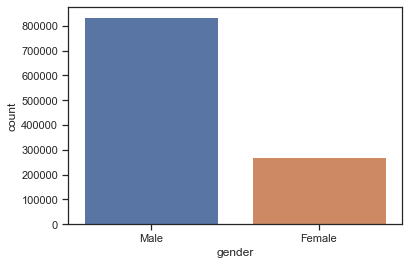

In [18]:
sns.countplot(x="gender", data=hubway_data)
plt.show()

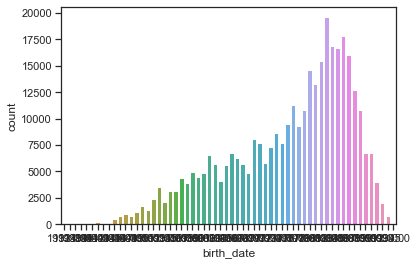

In [26]:
sns.countplot(x="birth_date", data=hubway_data)

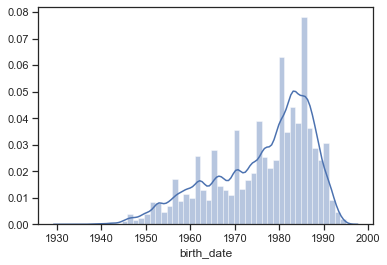

In [33]:
gender = hubway_data['birth_date']
gender_clean = gender[~np.isnan(gender)]
sns.distplot(gender_clean)

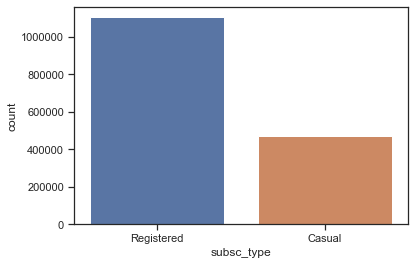

In [34]:
sns.countplot(x="subsc_type", data=hubway_data)

In [40]:
print(hubway_data['strt_statn'])

0           23.0
1           23.0
2           23.0
3           23.0
4           23.0
           ...  
1579020    130.0
1579021     67.0
1579022    137.0
1579023     76.0
1579024     68.0
Name: strt_statn, Length: 1579025, dtype: float64


In [41]:
station_data = pd.read_csv('C:/Users/kchatter/Documents/GitHub/machine_learning/CSHA/1/hubway_data/hubway_stations.csv', low_memory=False)
station_data.head()

,id,terminal,station,municipal,lat,lng,status
0,3,B32006,Colleges of the Fenway,Boston,42.340021,-71.100812,Existing
1,4,C32000,Tremont St. at Berkeley St.,Boston,42.345392,-71.069616,Existing
2,5,B32012,Northeastern U / North Parking Lot,Boston,42.341814,-71.090179,Existing
3,6,D32000,Cambridge St. at Joy St.,Boston,42.361285,-71.065140,Existing
4,7,A32000,Fan Pier,Boston,42.353412,-71.044624,Existing


In [45]:
hubway_data_with_gps = hubway_data.join(station_data.set_index('id'), on='strt_statn',how='left', lsuffix='_left', rsuffix='_right')
hubway_data_with_gps.head()

,seq_id,hubway_id,status_left,duration,start_date,strt_statn,end_date,end_statn,bike_nr,subsc_type,zip_code,birth_date,gender,terminal,station,municipal,lat,lng,status_right
0,1,8,Closed,9,7/28/2011 10:12:00,23.0,7/28/2011 10:12:00,23.0,B00468,Registered,'97217,1976.0,Male,B32008,Mayor Thomas M. Menino - Government Center,Boston,42.359677,-71.059364,Removed
1,2,9,Closed,220,7/28/2011 10:21:00,23.0,7/28/2011 10:25:00,23.0,B00554,Registered,'02215,1966.0,Male,B32008,Mayor Thomas M. Menino - Government Center,Boston,42.359677,-71.059364,Removed
2,3,10,Closed,56,7/28/2011 10:33:00,23.0,7/28/2011 10:34:00,23.0,B00456,Registered,'02108,1943.0,Male,B32008,Mayor Thomas M. Menino - Government Center,Boston,42.359677,-71.059364,Removed
3,4,11,Closed,64,7/28/2011 10:35:00,23.0,7/28/2011 10:36:00,23.0,B00554,Registered,'02116,1981.0,Female,B32008,Mayor Thomas M. Menino - Government Center,Boston,42.359677,-71.059364,Removed
4,5,12,Closed,12,7/28/2011 10:37:00,23.0,7/28/2011 10:37:00,23.0,B00554,Registered,'97214,1983.0,Female,B32008,Mayor Thomas M. Menino - Government Center,Boston,42.359677,-71.059364,Removed


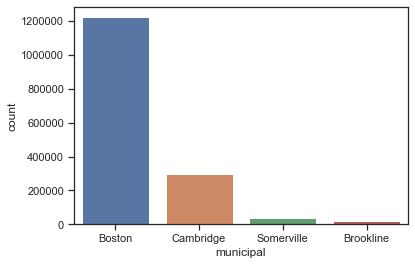

In [47]:
sns.countplot(x="municipal", data=hubway_data_with_gps)

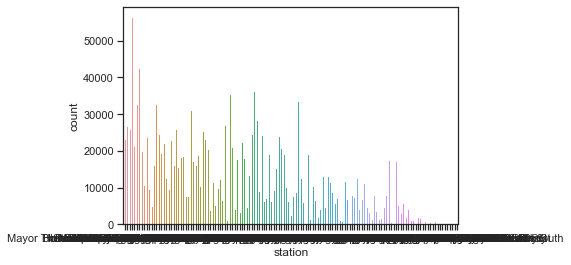

In [48]:
sns.countplot(x="station", data=hubway_data_with_gps)